In [82]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

In [100]:
pd.options.display.float_format = '{:,.3f}'.format

In [88]:
sales = pd.read_csv("Datasets/IEA Global EV Data 2024 v2.csv")


sales

#Note, ROTW = World - [USA, China, Europe], calculated in Excel/csv. 
# #Also, filtered for only EV Sales and removed projections / numbers beyond 2023.

,region,category,parameter,mode,powertrain,Year,unit,quantity
0,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49
1,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170
2,Australia,Historical,EV sales,Cars,PHEV,2012,Vehicles,80
3,Australia,Historical,EV sales,Cars,PHEV,2013,Vehicles,100
4,Australia,Historical,EV sales,Cars,BEV,2013,Vehicles,190
...,...,...,...,...,...,...,...,...
2510,ROTW,Historical,EV sales,ALL,ALL,2019,Vehicles,"124,582"
2511,ROTW,Historical,EV sales,ALL,ALL,2020,Vehicles,"177,152"
2512,ROTW,Historical,EV sales,ALL,ALL,2021,Vehicles,"477,055"
2513,ROTW,Historical,EV sales,ALL,ALL,2022,Vehicles,"682,007"


In [89]:
policies = pd.read_csv("Datasets/Policy Explorer 2024 v2.csv", encoding='latin-1')

#convert Year to integer
policies['Year'] = policies['Year'].astype(int)
policies

,Region,Region2,Country,Policy Level,Province,Policy Type,Key policy measures and targets,Category,Year
0,Africa,Rest of the World,Algeria,National,NaN,Legislation,Ban on imports more than 3 years old.,Multiple,2021
1,Africa,Rest of the World,Angola,National,NaN,Legislation,50% reduction of both import duty and vehicle ...,Multiple,2022
2,Central and South America,Rest of the World,Antigua and Barbuda,National,NaN,Target,Transition the government fleet to all-electri...,Multiple,2021
3,Central and South America,Rest of the World,Argentina,National,NaN,Ambition,2 500 jobs in battery manufacturing by 2030.,Manufacturing,2021
4,Central and South America,Rest of the World,Argentina,National,NaN,Proposal,Ban on sale of new ICE vehicles from 2041.,Multiple,2021
...,...,...,...,...,...,...,...,...,...
626,Eurasia,Rest of the World,Uzbekistan,National,NaN,Ambition,2 500 charging stations by 2025.,EVSE,2023
627,Eurasia,Rest of the World,Uzbekistan,National,NaN,Legislation,Exemptions and/or reductions of various taxes ...,Taxation,2021
628,Southeast Asia,Rest of the World,Viet Nam,National,NaN,Proposal,Decree No. 57/2020/ND-CP: Encourage the produc...,Manufacturing,2016
629,Southeast Asia,Rest of the World,Viet Nam,National,NaN,Target,Net zero greenhouse gas emissions in the trans...,Multiple,2022


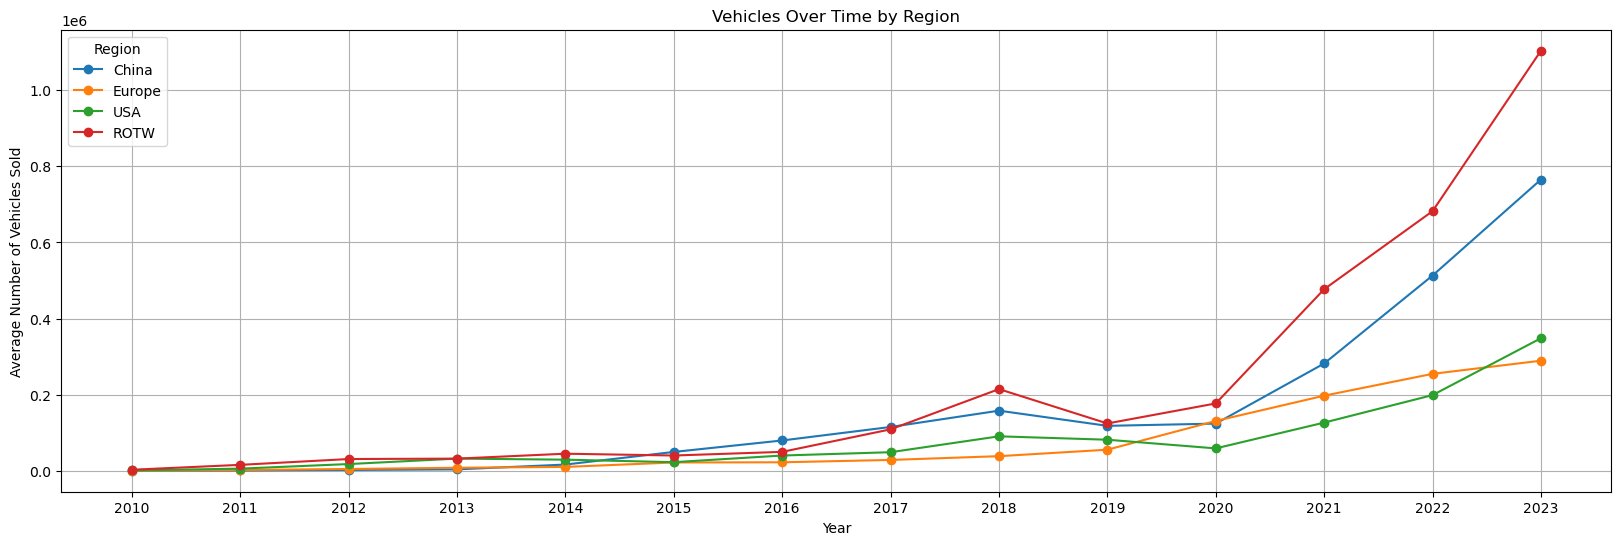

,region,Year,quantity
0,China,2010,632
1,China,2011,"1,174"
2,China,2012,"2,488"
3,China,2013,"4,056"
4,China,2014,"16,696"
5,China,2015,"49,833"
6,China,2016,"79,933"
7,China,2017,"115,374"
8,China,2018,"158,186"
9,China,2019,"118,346"


In [90]:
#Group sales by region and year, total by average of unit = 'Vehicles'
selected_regions = ['USA', 'China', 'Europe', 'ROTW']
filtered_sales = sales[sales['region'].isin(selected_regions)]
average_data = filtered_sales.groupby(['region','Year'])['quantity'].mean().reset_index()
plt.figure(figsize=(20, 6))
for region in filtered_sales['region'].unique():
    region_data = average_data[average_data['region'] == region]
    plt.plot(region_data['Year'], region_data['quantity'], marker='o', label=region)

plt.title('Vehicles Over Time by Region')
plt.xlabel('Year')
plt.ylabel('Average Number of Vehicles Sold')
plt.legend(title='Region')
plt.grid()
plt.xticks(region_data['Year'].unique())  
plt.show()

average_data
#Create line graph of each country's sales over time. Add policies points on line

#Filter first for countries where there is a match between the two data sources. See if there's a trend in the location of the policy datapoint and the country's sales trends. 


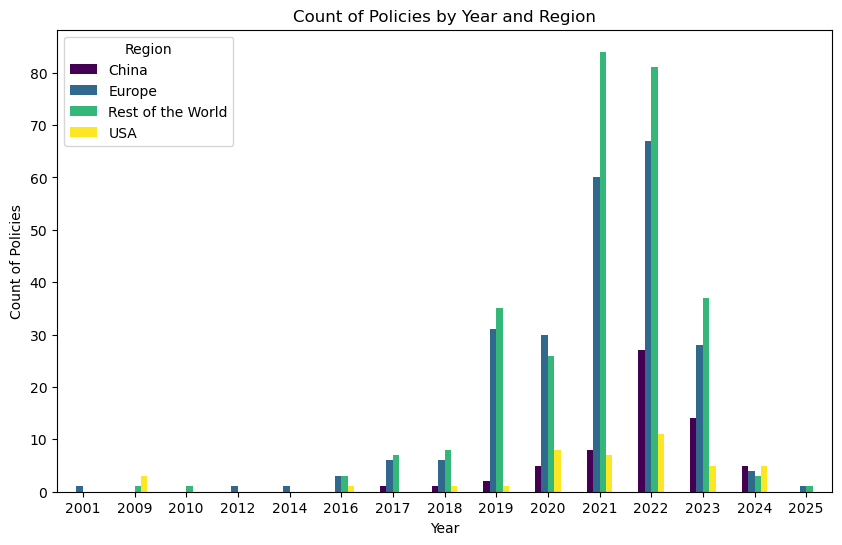

Region2,China,Europe,Rest of the World,USA
Year,,,,
2001,0,1,0,0
2009,0,0,1,3
2010,0,0,1,0
2012,0,1,0,0
2014,0,1,0,0
2016,0,3,3,1
2017,1,6,7,0
2018,1,6,8,1
2019,2,31,35,1


In [91]:
#Group policies by country and year, total by count of policy type
grouped_policies = policies.groupby(['Year', 'Region2']).size().unstack(fill_value=0)
ax = grouped_policies.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Count of Policies by Year and Region')
plt.xlabel('Year')
plt.ylabel('Count of Policies')

plt.xticks(rotation=0)
plt.legend(title='Region')
plt.show()

grouped_policies

In [92]:
merged_df = pd.merge(average_data, grouped_policies, on='Year', how='left')
merged_df

merged_df.to_csv('Datasets/merged_dataset.csv', index=False, encoding='utf-8')


In [93]:
final_dataset = pd.read_csv("Datasets/merged_dataset2.csv")
final_dataset



,region,Year,quantity,Policy Count
0,China,2010,632,0
1,China,2011,"1,174",0
2,China,2012,"2,488",0
3,China,2013,"4,056",0
4,China,2014,"16,696",0
5,China,2015,"49,833",0
6,China,2016,"79,933",0
7,China,2017,"115,374",1
8,China,2018,"158,186",1
9,China,2019,"118,346",2


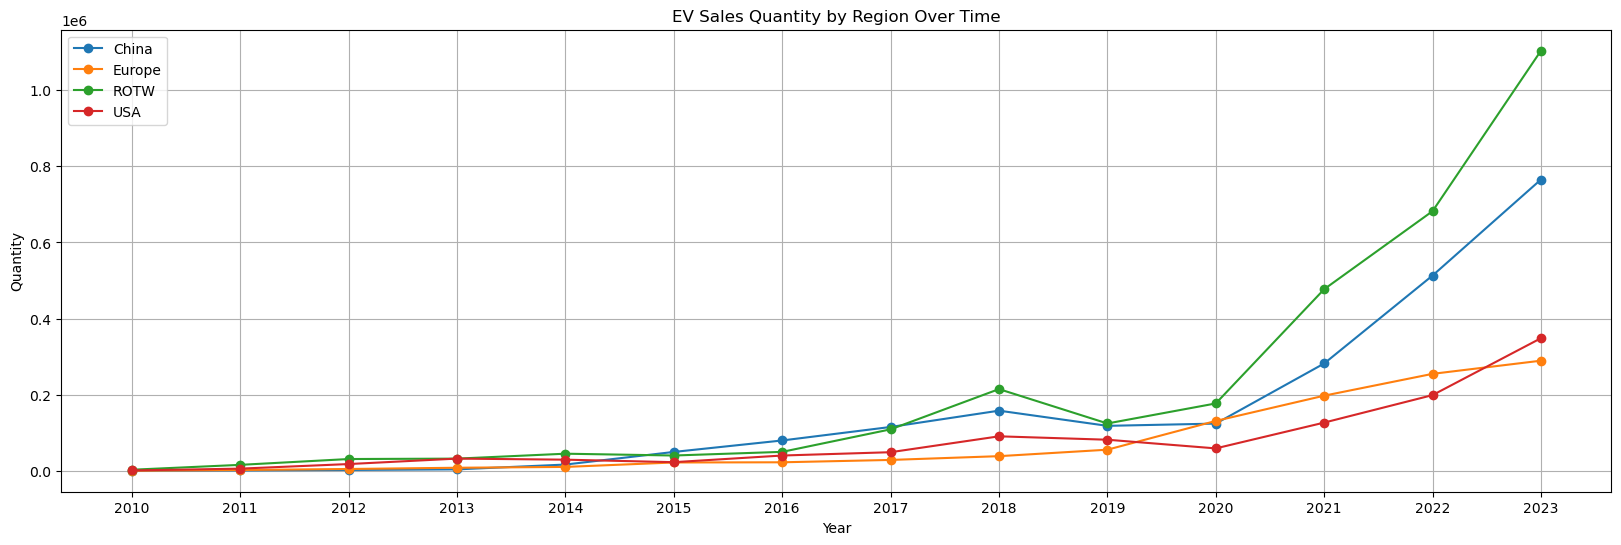

In [94]:
#Plot sales quantity
pivot_df = final_dataset.pivot_table(index='Year',columns='region',values='quantity',aggfunc='sum')
plt.figure(figsize=(20,6))
for region in pivot_df.columns:
    plt.plot(pivot_df.index,pivot_df[region],marker='o',label=region)

plt.title('EV Sales Quantity by Region Over Time')
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.legend()
plt.grid()
plt.xticks(pivot_df.index)  # Show all years on the x-axis
plt.show()

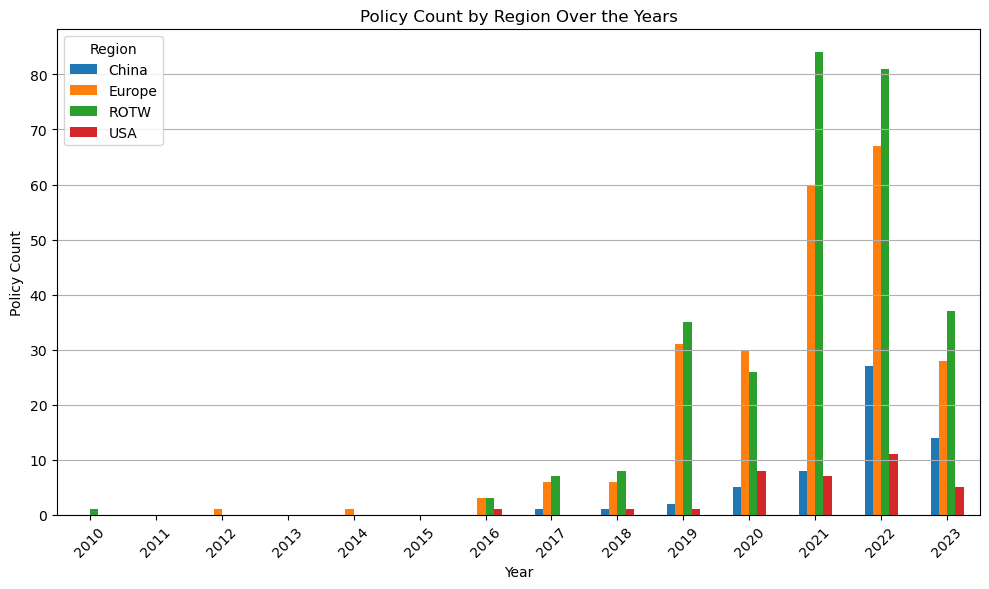

In [95]:
grouped_df = final_dataset.groupby(['Year','region'])['Policy Count'].sum().unstack(fill_value=0)
grouped_df.plot(kind='bar',figsize=(10,6))
plt.title('Policy Count by Region Over the Years')
plt.xlabel('Year')
plt.ylabel('Policy Count')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.grid(axis='y')
plt.tight_layout()  # Adjust layout to make room for the labels
plt.show()

In [102]:
#Correlation
correlation, p_value = pearsonr(final_dataset['Policy Count'], final_dataset['quantity'])
print(correlation, p_value)

0.6103940953846173 5.887793980411518e-07


In [101]:
correlation_group = final_dataset.groupby('region').apply(lambda x: pearsonr(x['Year'], x['quantity'])[0])
print(correlation_group)

region
China    0.814
Europe   0.864
ROTW     0.793
USA      0.809
dtype: float64


C:\Users\jenn2\AppData\Local\Temp\ipykernel_17168\32393350.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_group = final_dataset.groupby('region').apply(lambda x: pearsonr(x['Year'], x['quantity'])[0])
